In [1]:
### Predicting House Price In California ###
### Machine Learning ###

In [2]:
### Importing Required libraries ###
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [3]:
### Loading Data
data_housing = pd.read_csv('C:/Users/charl/OneDrive/Desktop\Data Science Projects/Python Projects/housing.csv')
data_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
### Data Description
data_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
### Data Cleaning ##
## Missing values in data ##
data_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
### Treating missing values
##Imputation of null values with mean 
data_housing.total_bedrooms=data_housing.total_bedrooms.fillna(data_housing.total_bedrooms.mean())
data_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
### Converting catergorical variables to numerical variables
le = LabelEncoder()
data_housing['ocean_proximity']=le.fit_transform(data_housing['ocean_proximity'])

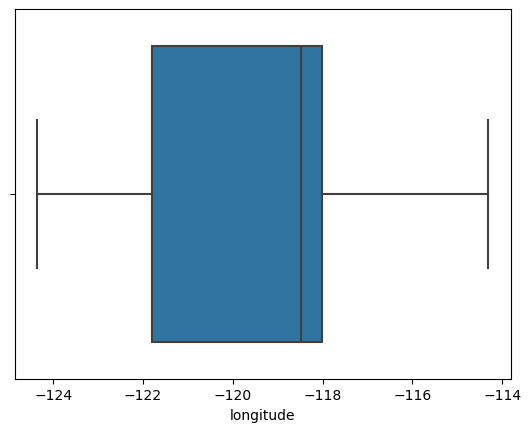

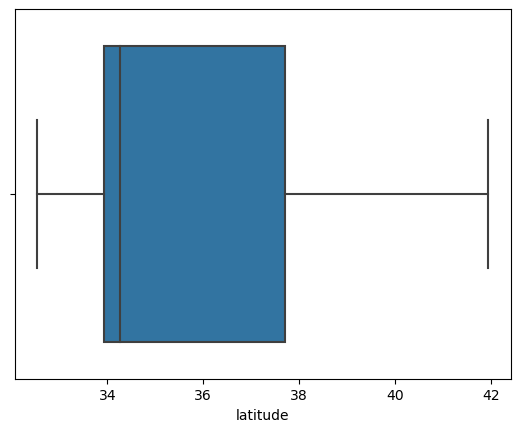

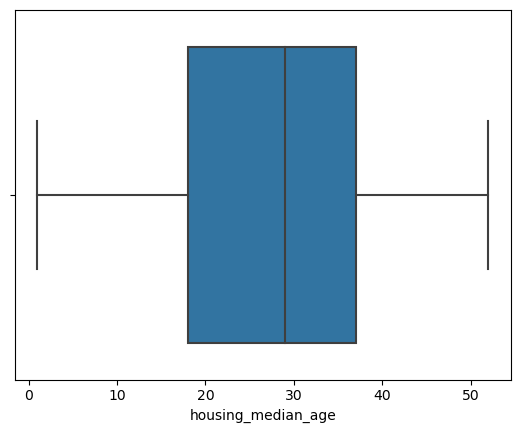

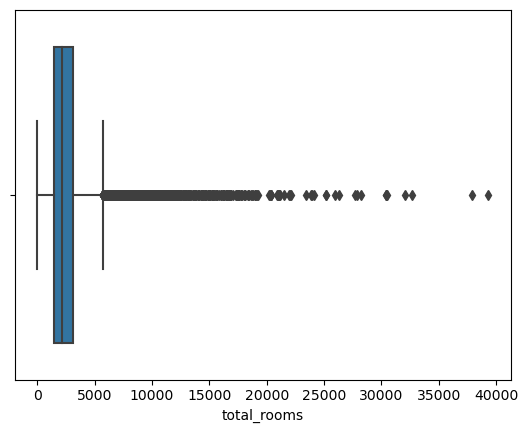

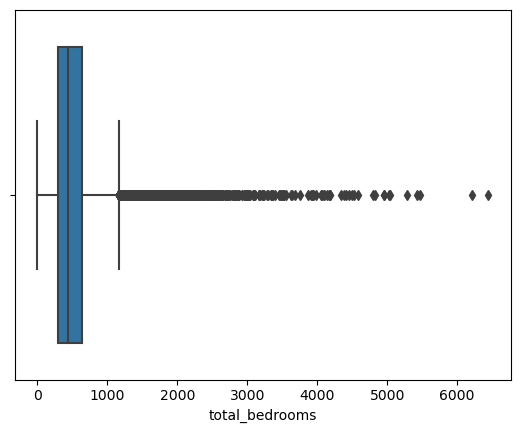

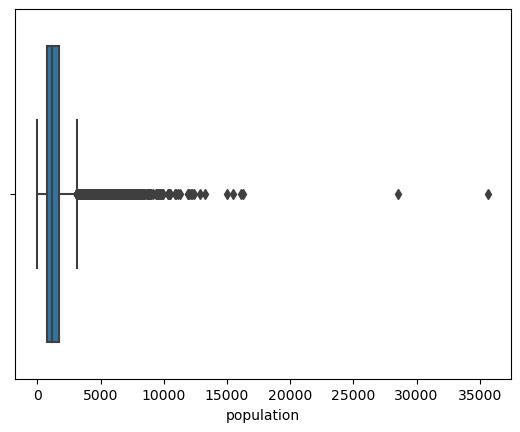

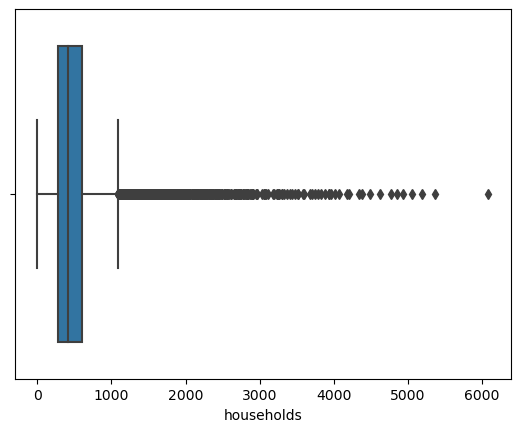

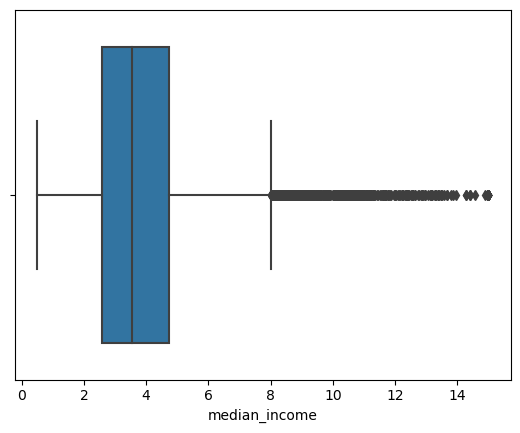

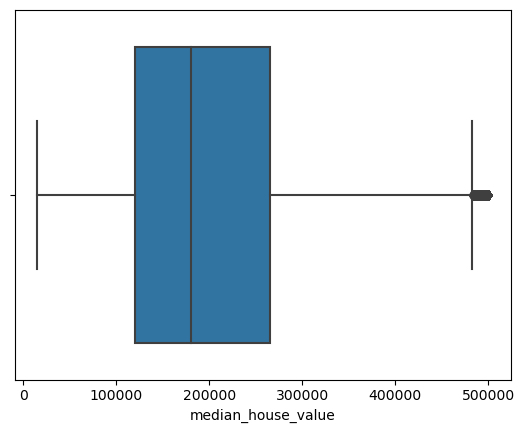

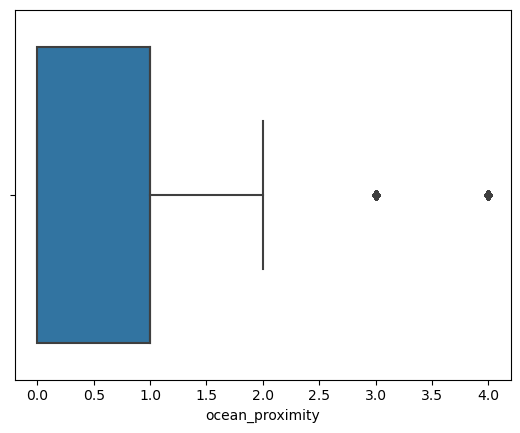

In [9]:
### Detecting outliers
for column in data_housing:
    plt.figure()
    sns.boxplot(x=data_housing[column])

In [10]:
data_housing.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8536,-118.35,33.89,30.0,1143.0,299.0,776.0,273.0,4.2829,240000.0,0


In [11]:
#### Standardizing the dataset
# Get column names first
names =data_housing.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_housingData = scaler.fit_transform(data_housing)
scaled_housingData = pd.DataFrame(scaled_housingData, columns=names)
scaled_housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,1.291089


<AxesSubplot:>

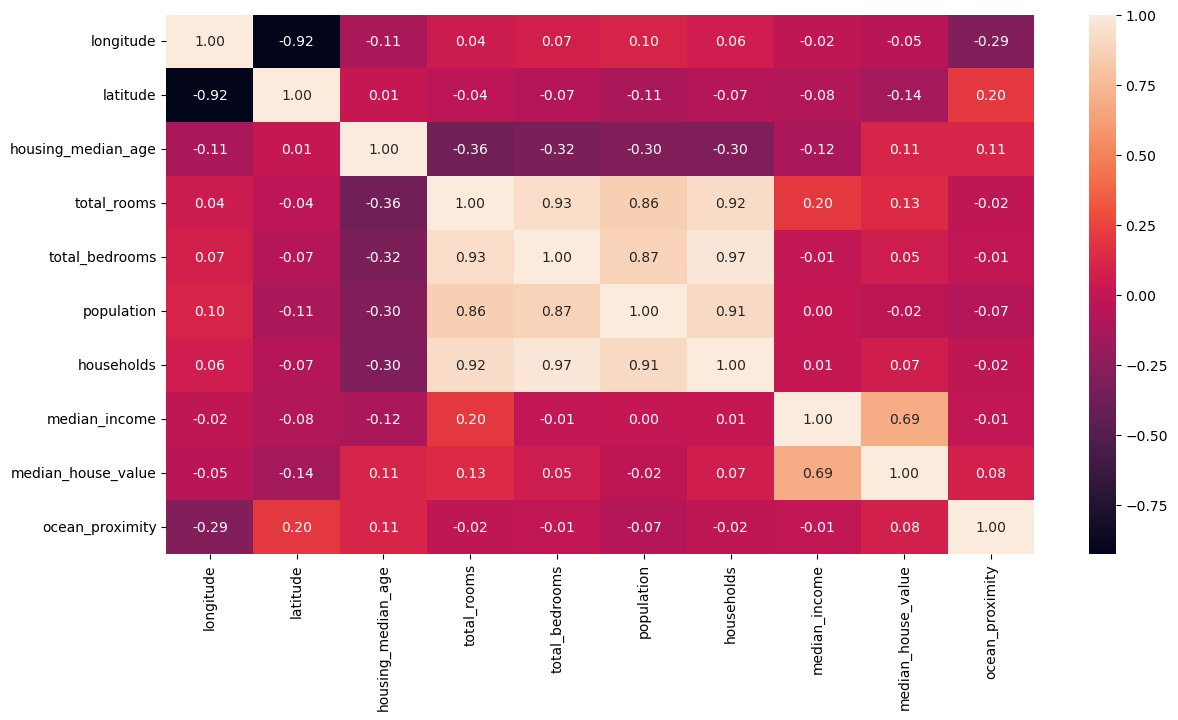

In [12]:
#### Exploratory data Analysis
###Correlation Matrix
plt.figure(figsize=(14,7))
sns.heatmap(scaled_housingData.corr(), annot=True, fmt='.2f',)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

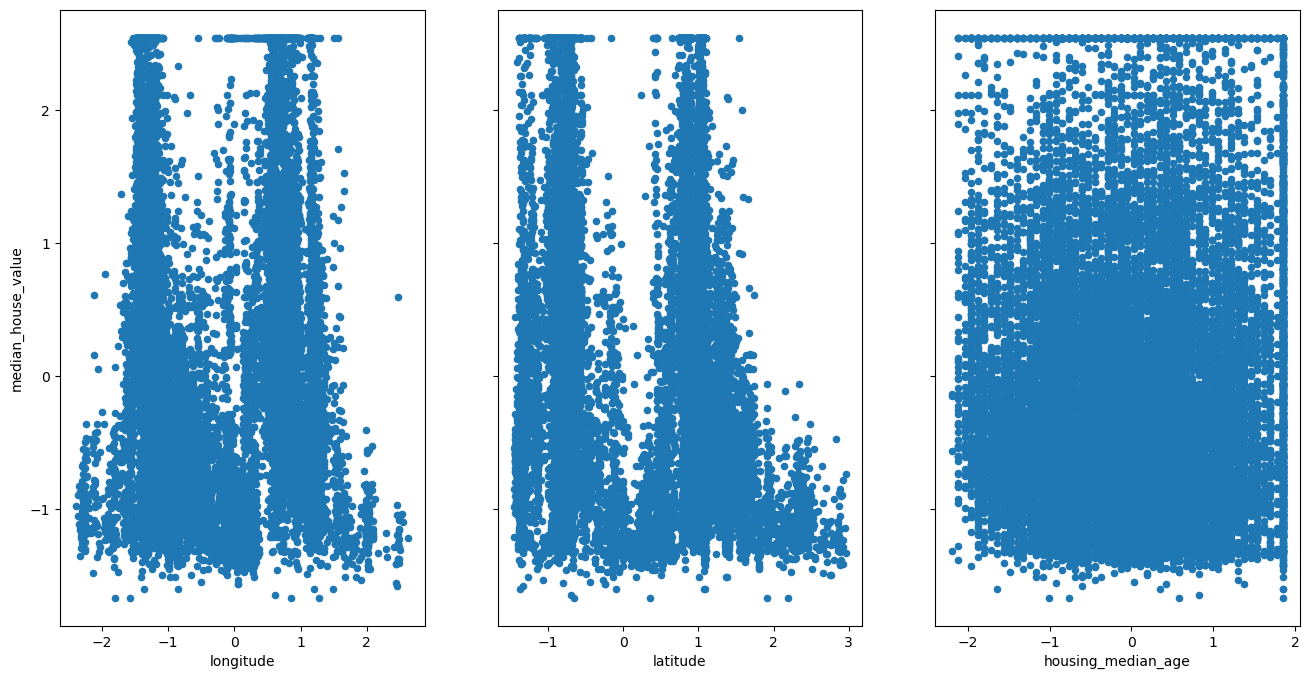

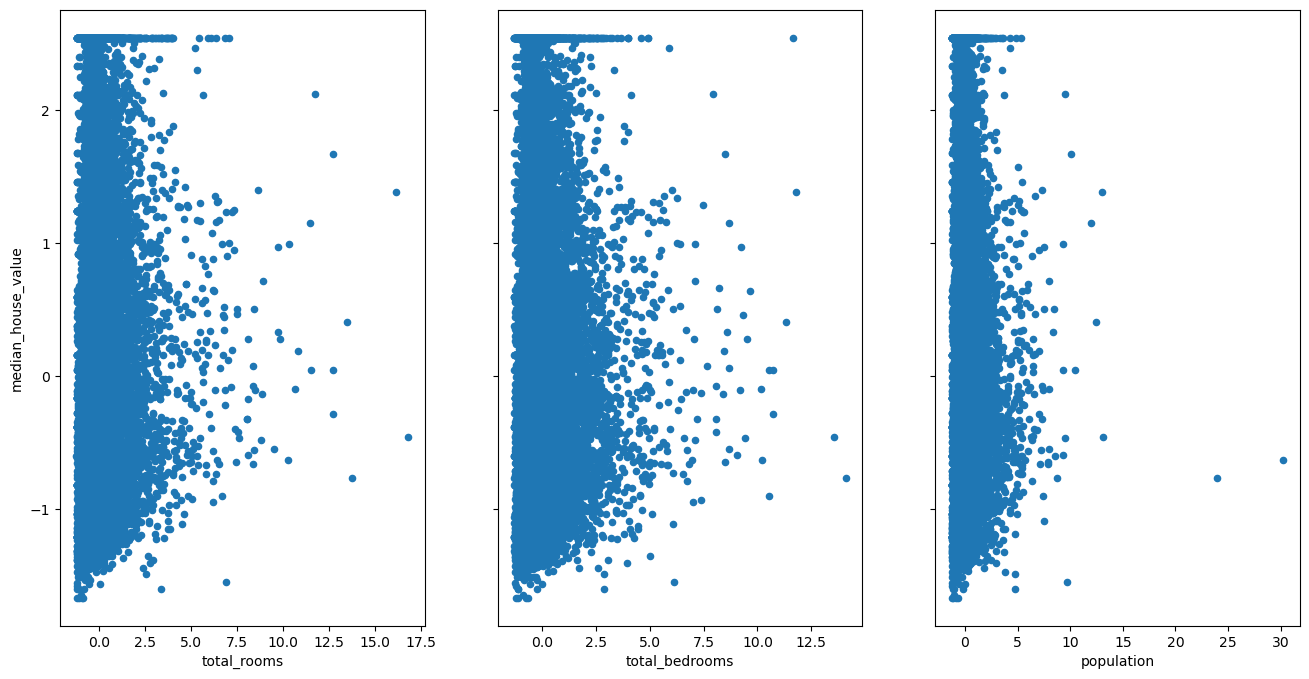

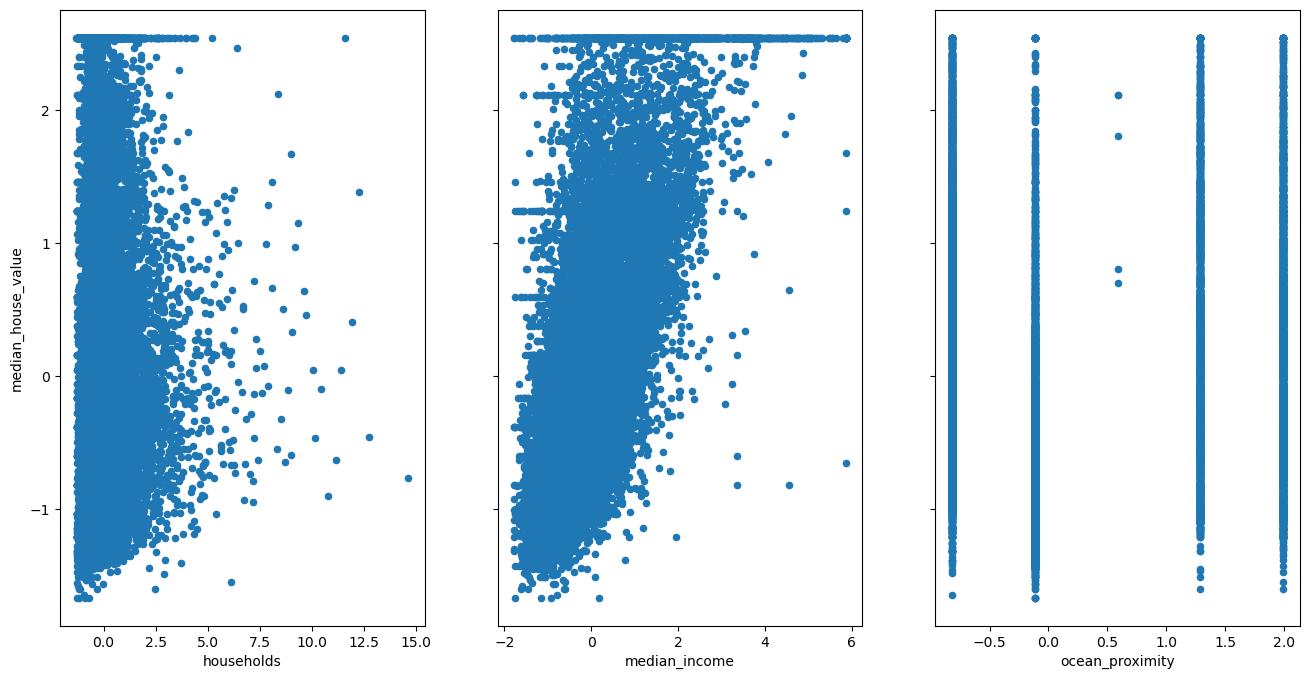

In [14]:
#### Checking for the presence of linearity
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_housingData.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_housingData.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_housingData.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_housingData.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_housingData.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_housingData.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_housingData.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_housingData.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_housingData.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

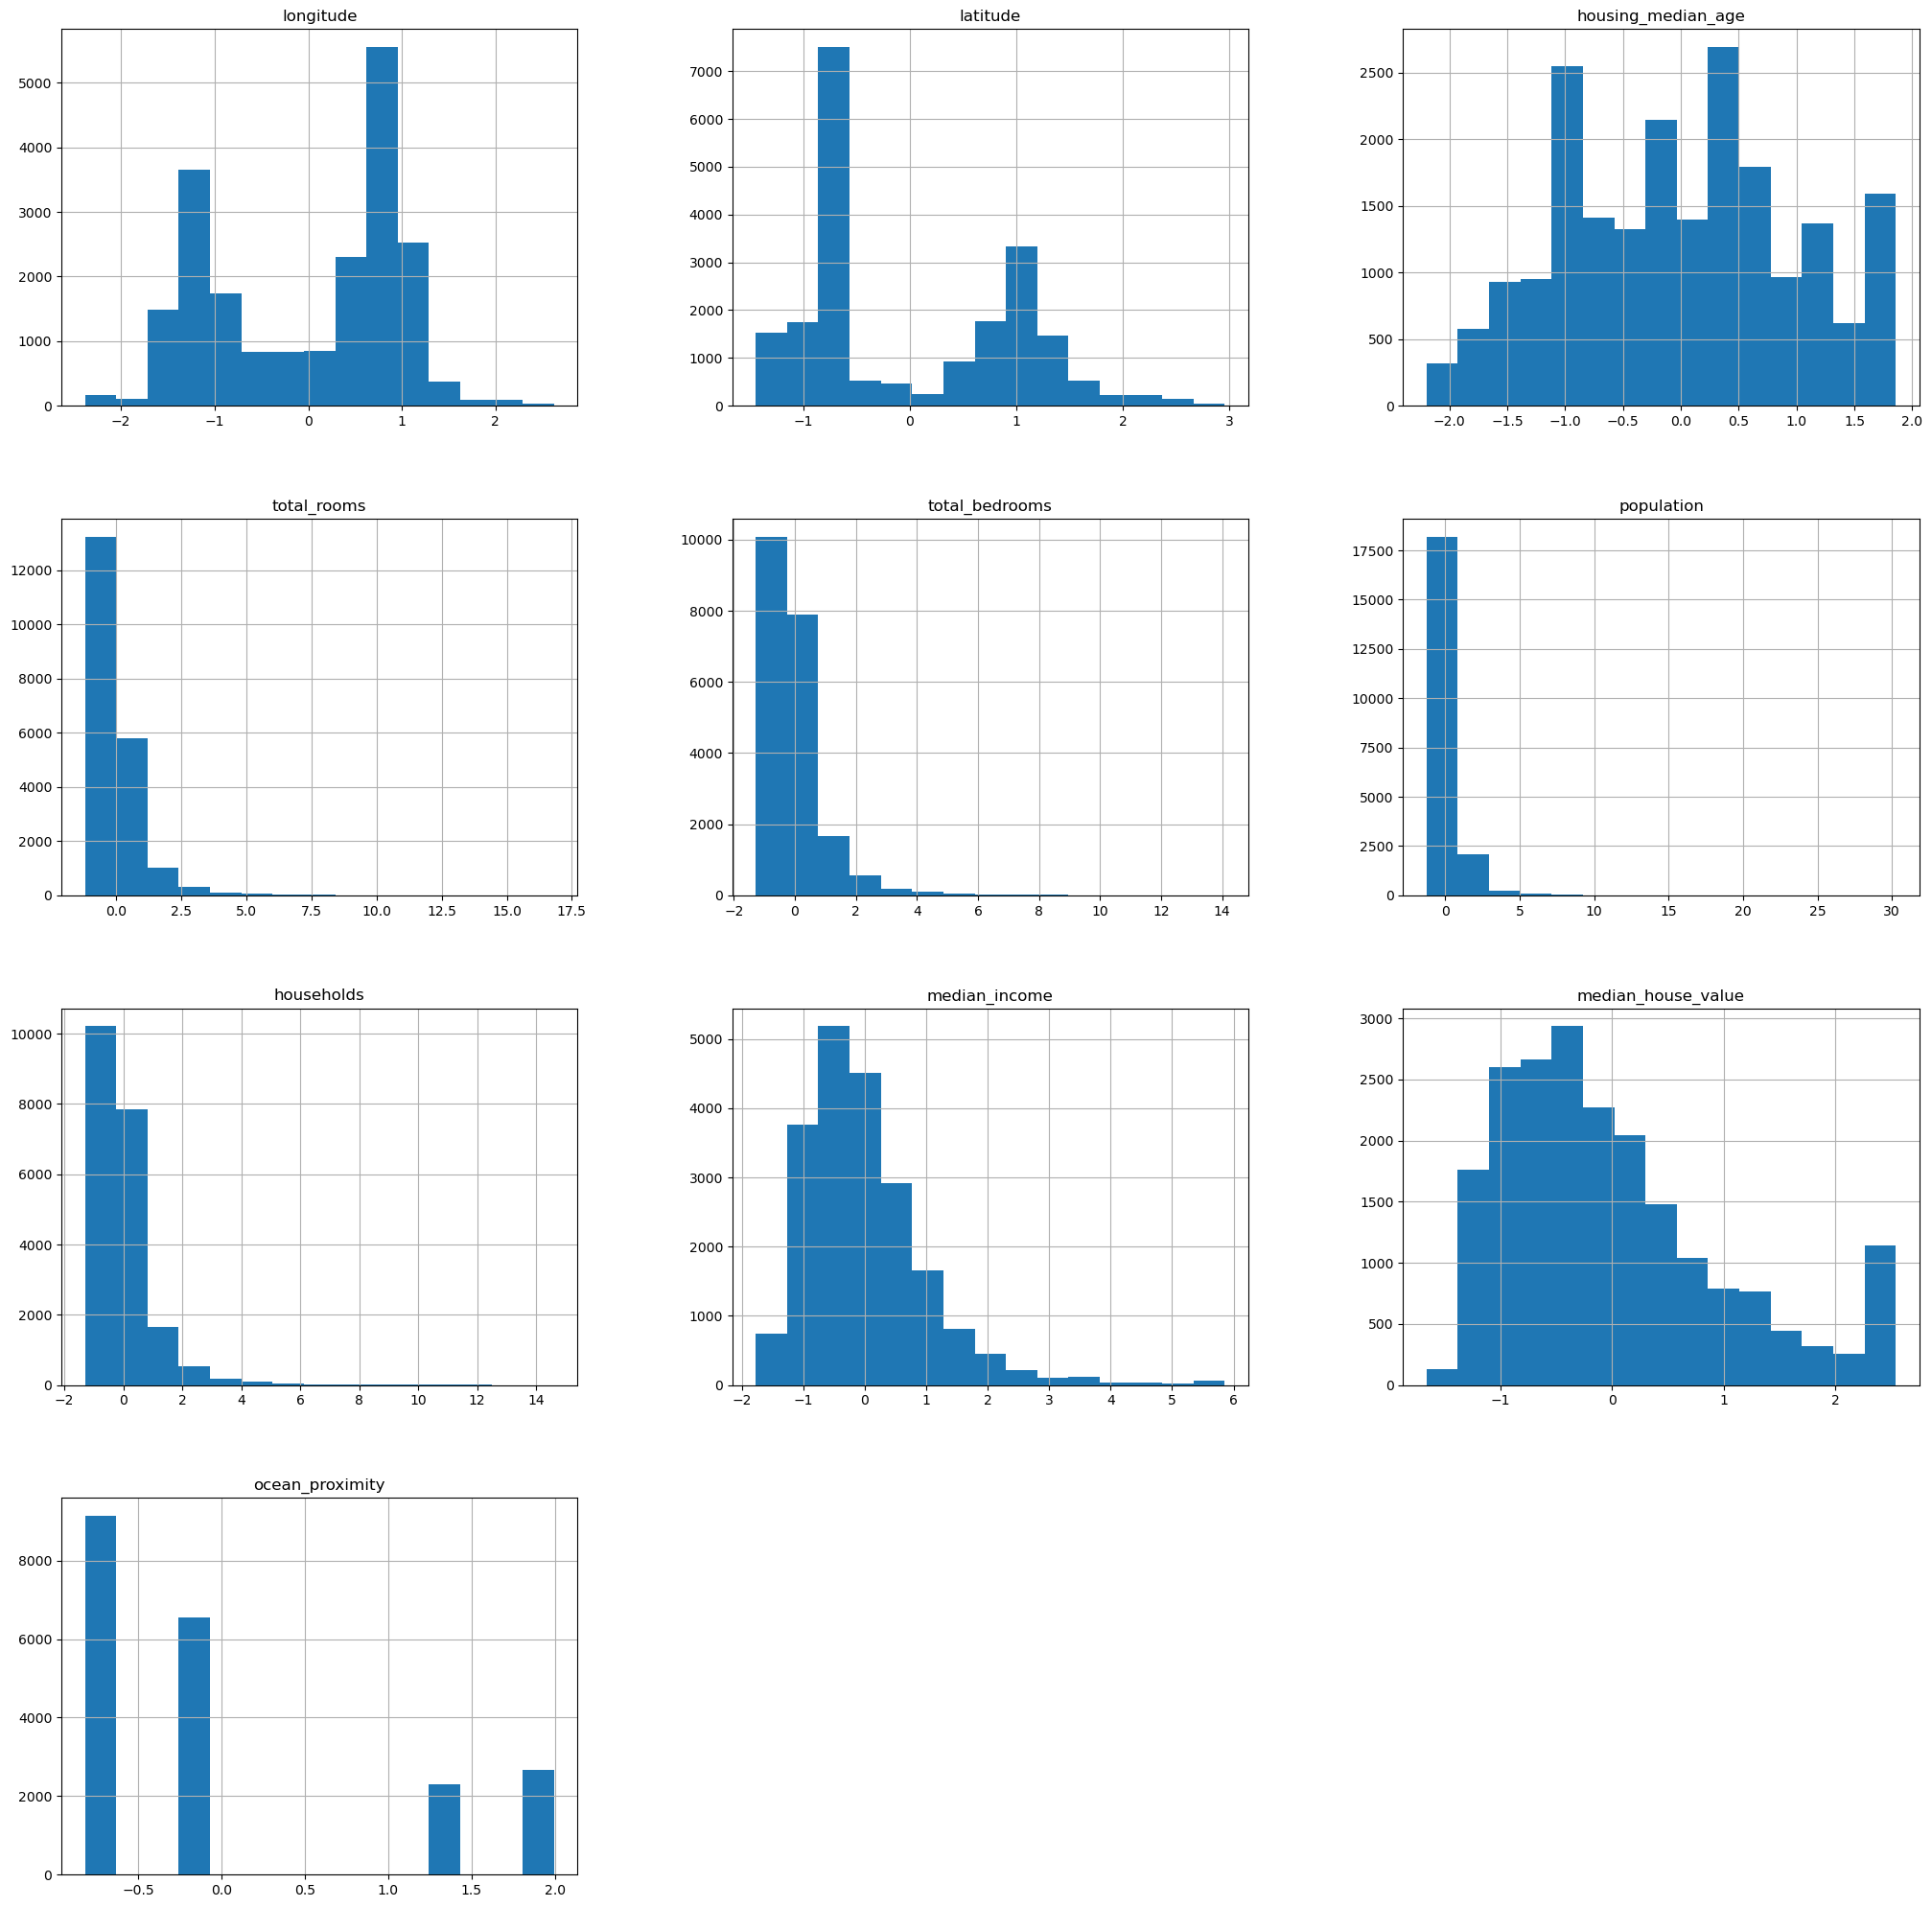

In [15]:
scaled_housingData.hist(figsize=(25,25),bins=15);

In [16]:
hcorr = scaled_housingData.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.014688
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,0.081750,1.000000


In [17]:
### Prepare dataset for machine learning
#### Extract for X and Y inputs from dataset
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_housingData[X_Features]
Y=scaled_housingData['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [18]:
### Checking for the shape of dataframe
print(scaled_housingData.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 9)
(20640,)


In [19]:
#### Splitting Dataset into Train and Test Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


In [20]:
######### Modelling ###########
#Applying Various Algorithmns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=8)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [21]:
print('=========================================')
print('           Linear Regression       ')
print('=========================================')
# perform linear regression on the training data
# Predict output for test dataset using the fitted model.
# Print root mean squared error (RMSE) from Linear Regression.
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
print ('Coefficients: \n', linear_reg.coef_)


           Linear Regression       
Coefficients: 
 [-0.741358   -0.78605901  0.12673027 -0.13863561  0.3226434  -0.38283216
  0.23717833  0.66374117  0.00527297]


In [22]:
#### Regression Evaluation Metrics
test_pred =linear_reg.predict(x_test)
train_pred = linear_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.44127706069434175
MSE: 0.3668238079083628
RMSE: 0.6056598120301221
R2 Square 0.6276223517950296
Train set evaluation:
_____________________________________
MAE: 0.44152129726708017
MSE: 0.36388285191994396
RMSE: 0.6032270318213069
R2 Square 0.6373640148669426


In [23]:
from sklearn.linear_model import LinearRegression
results_housingData = pd.DataFrame(data=[["Linear Regression", *evaluate(y_train, train_pred),
cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_housingData

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.441521,0.363883,0.603227,0.637364,0.56488


In [24]:
print('=========================================')
print('           Ridge Regression       ')
print('=========================================')
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

           Ridge Regression       
Test set evaluation:
_____________________________________
MAE: 0.441422524535047
MSE: 0.3669965510002849
RMSE: 0.6058024026035923
R2 Square 0.6274469933124915
Train set evaluation:
_____________________________________
MAE: 0.44176116199793664
MSE: 0.3645245263387708
RMSE: 0.603758665642797
R2 Square 0.6367245391846503


In [25]:
from sklearn.linear_model import LinearRegression
results_housingData_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_train, train_pred),
cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_housingData= results_housingData.append(results_housingData_2, ignore_index=True)
results_housingData

C:\Users\charl\AppData\Local\Temp\ipykernel_21028\3329260762.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_housingData= results_housingData.append(results_housingData_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.441521,0.363883,0.603227,0.637364,0.56488
1,Ridge Regression,0.441761,0.364525,0.603759,0.636725,0.56488


In [26]:
print('=========================================')
print('            Lasso Regression       ')
print('=========================================')
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

            Lasso Regression       
Test set evaluation:
_____________________________________
MAE: 0.5391478102709901
MSE: 0.504684843820685
RMSE: 0.7104117424569255
R2 Square 0.4876740517518764
Train set evaluation:
_____________________________________
MAE: 0.5434961765420648
MSE: 0.5140315643947342
RMSE: 0.7169599461578967
R2 Square 0.4877297961136642


In [27]:
from sklearn.linear_model import LinearRegression
results_housingData_3 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_train, train_pred),
cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_housingData= results_housingData.append(results_housingData_3, ignore_index=True)
results_housingData

C:\Users\charl\AppData\Local\Temp\ipykernel_21028\946766229.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_housingData= results_housingData.append(results_housingData_3, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.441521,0.363883,0.603227,0.637364,0.56488
1,Ridge Regression,0.441761,0.364525,0.603759,0.636725,0.56488
2,Lasso Regression,0.543496,0.514032,0.716960,0.487730,0.56488


In [28]:
print('=========================================')
print('            ELastic Net       ')
print('=========================================')
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

            ELastic Net       
Test set evaluation:
_____________________________________
MAE: 0.5370877681082359
MSE: 0.5014572229962047
RMSE: 0.7081364437706936
R2 Square 0.49095053988052484
Train set evaluation:
_____________________________________
MAE: 0.5412924296462165
MSE: 0.5104572757453977
RMSE: 0.7144629281813002
R2 Square 0.4912918372449324


In [29]:
from sklearn.linear_model import LinearRegression
results_housingData_4 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_train, train_pred),
cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_housingData= results_housingData.append(results_housingData_4, ignore_index=True)
results_housingData

C:\Users\charl\AppData\Local\Temp\ipykernel_21028\1259248365.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_housingData= results_housingData.append(results_housingData_4, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.441521,0.363883,0.603227,0.637364,0.56488
1,Ridge Regression,0.441761,0.364525,0.603759,0.636725,0.56488
2,Lasso Regression,0.543496,0.514032,0.716960,0.487730,0.56488
3,Elastic Net Regression,0.541292,0.510457,0.714463,0.491292,0.56488


In [30]:
print('=========================================')
print('          Random Forest Regressor       ')
print('=========================================')

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=25)
rf_reg.fit(x_train, y_train)

test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

          Random Forest Regressor       
Test set evaluation:
_____________________________________
MAE: 0.2833420196535349
MSE: 0.1910812323954806
RMSE: 0.43712839349038013
R2 Square 0.8060257311507116
Train set evaluation:
_____________________________________
MAE: 0.10807827785580318
MSE: 0.029355482534951367
RMSE: 0.1713344172516175
R2 Square 0.970745105816472


In [31]:
from sklearn.linear_model import LinearRegression
results_housingData_5 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_train, train_pred),
cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_housingData= results_housingData.append(results_housingData_5, ignore_index=True)
results_housingData

C:\Users\charl\AppData\Local\Temp\ipykernel_21028\1090439406.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_housingData= results_housingData.append(results_housingData_5, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.441521,0.363883,0.603227,0.637364,0.56488
1,Ridge Regression,0.441761,0.364525,0.603759,0.636725,0.56488
2,Lasso Regression,0.543496,0.514032,0.716960,0.487730,0.56488
3,Elastic Net Regression,0.541292,0.510457,0.714463,0.491292,0.56488
4,Random Forest Regressor,0.108078,0.029355,0.171334,0.970745,0.56488


In [32]:
print('=========================================')
print('         XGB Regressor      ')
print('=========================================')
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(x_train, y_train)
test_pred = xgb_reg.predict(x_test)
train_pred = xgb_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

         XGB Regressor      
Test set evaluation:
_____________________________________
MAE: 0.27536419970114523
MSE: 0.17189713512577612
RMSE: 0.41460479390110305
R2 Square 0.8255002823390918
Train set evaluation:
_____________________________________
MAE: 0.17798342929625147
MSE: 0.06349436091970563
RMSE: 0.25198087411489317
R2 Square 0.9367232063807803


In [33]:
results_housingData_6 = pd.DataFrame(data=[["XGB Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_housingData = results_housingData.append(results_housingData_6, ignore_index=True)
results_housingData

C:\Users\charl\AppData\Local\Temp\ipykernel_21028\1378666297.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_housingData = results_housingData.append(results_housingData_6, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.441521,0.363883,0.603227,0.637364,0.56488
1,Ridge Regression,0.441761,0.364525,0.603759,0.636725,0.56488
2,Lasso Regression,0.543496,0.514032,0.716960,0.487730,0.56488
3,Elastic Net Regression,0.541292,0.510457,0.714463,0.491292,0.56488
4,Random Forest Regressor,0.108078,0.029355,0.171334,0.970745,0.56488
5,XGB Regressor,0.275364,0.171897,0.414605,0.825500,0.00000


        Model Comparison      


<AxesSubplot:ylabel='Model'>

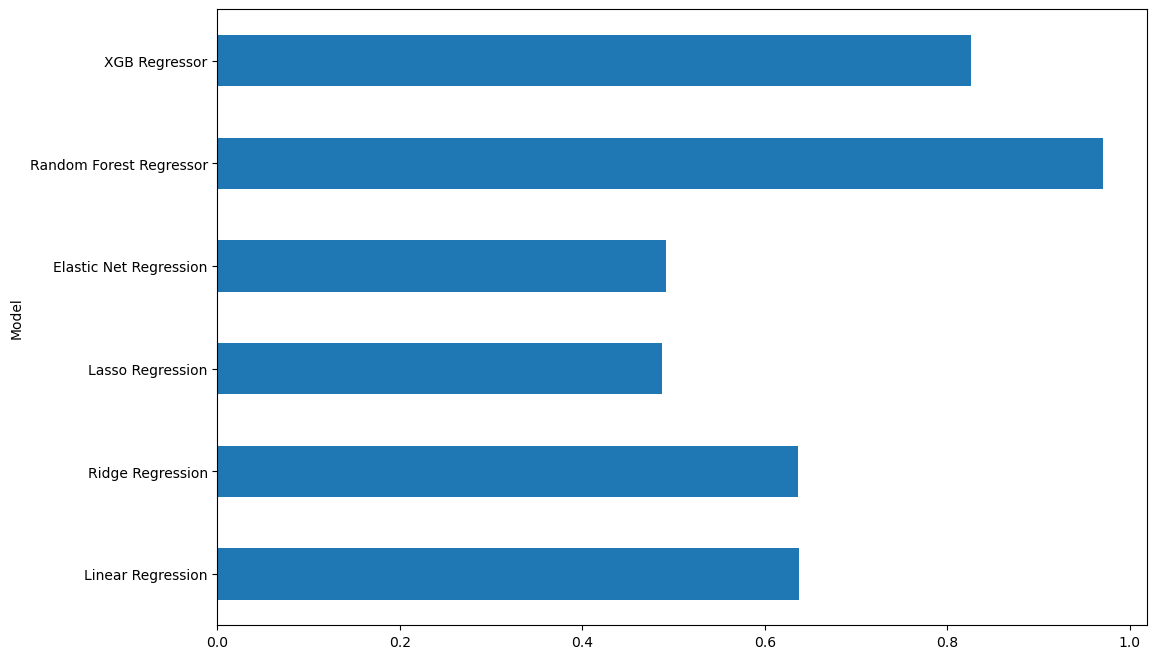

In [34]:
print('=========================================')
print('        Model Comparison      ')
print('=========================================')
results_housingData.set_index('Model', inplace=True)
results_housingData['R2 Square'].plot(kind='barh', figsize=(12, 8))